## Edge Detection, Line Detection and Corner Detection

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load image and convert to grayscale
img = cv2.imread('images/table_image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# Step 2: Edge Detection
sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0) + cv2.Sobel(gray, cv2.CV_64F, 0, 1)
canny = cv2.Canny(gray, 100, 200)

In [5]:
# Step 3: Line Detection using Hough Transform
img_lines = img.copy()
lines = cv2.HoughLines(canny, 1, np.pi/180, 150)
if lines is not None:
    for r, t in lines[:, 0]:
        a, b = np.cos(t), np.sin(t)
        x0, y0 = a*r, b*r
        x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
        x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
        cv2.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 1)

In [7]:
# Step 4: Corner Detection
img_harris = img.copy()
harris = cv2.cornerHarris(np.float32(gray), 2, 3, 0.04)
img_harris[harris > 0.001 * harris.max()] = [0, 0, 255]

img_shi = img.copy()
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
for c in np.int32(corners):
    x, y = c.ravel()
    cv2.circle(img_shi, (x, y), 3, (0, 255, 0), -1)

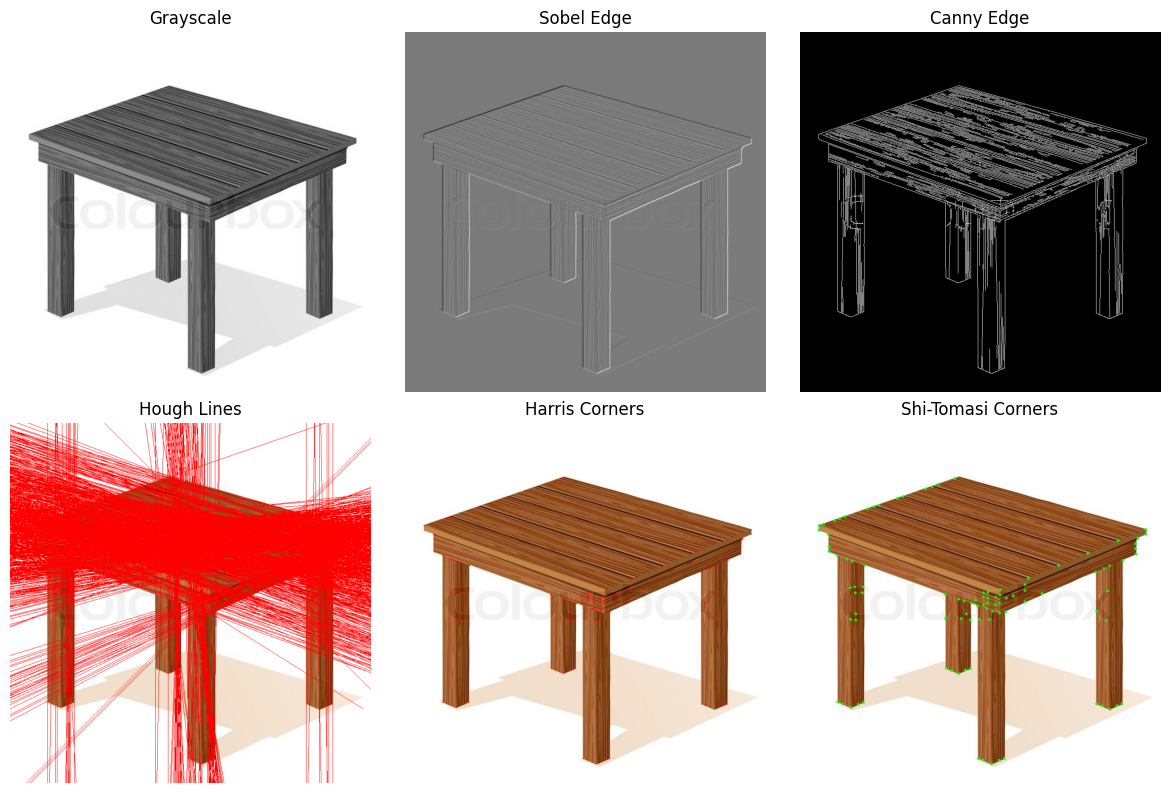

In [8]:
# Step 5: Display all results
plt.figure(figsize=(12,8))
plt.subplot(231); plt.imshow(gray, cmap='gray'); plt.title('Grayscale'); plt.axis('off')
plt.subplot(232); plt.imshow(sobel, cmap='gray'); plt.title('Sobel Edge'); plt.axis('off')
plt.subplot(233); plt.imshow(canny, cmap='gray'); plt.title('Canny Edge'); plt.axis('off')
plt.subplot(234); plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)); plt.title('Hough Lines'); plt.axis('off')
plt.subplot(235); plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB)); plt.title('Harris Corners'); plt.axis('off')
plt.subplot(236); plt.imshow(cv2.cvtColor(img_shi, cv2.COLOR_BGR2RGB)); plt.title('Shi-Tomasi Corners'); plt.axis('off')
plt.tight_layout()
plt.show()